# __Hypothesis Testing with Men's and Women's Soccer Matches__

<h2 style='text-align: left;'> Project Description </h2>
<p style="font-size: 16px; text-align: left;"> You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. </p>

<center><img src='soccer.jpg' alt="Your Image"></center>

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.
    
You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's. </p>

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import kstest, norm

In [2]:
# Load the data from men_results.csv and women_results.csv

men_results = pd.read_csv('men_results.csv', parse_dates=['date'])
women_results = pd.read_csv('women_results.csv', parse_dates=['date'])

In [3]:
men_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [4]:
women_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [5]:
men_results.drop(columns='Unnamed: 0', axis=1, inplace=True)
women_results.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [6]:
# Use .info() method to display a concise summary of the DataFrame, including data types, number of non-null values, and memory usage
men_results.info()
women_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4884 non-null   datetime64[ns]
 1   home_team   4884 non-null   object        
 2   away_team   4884 non-null   object        
 3   home_score  4884 non-null   int64         
 4   away_score  4884 non-null   int64       

In [7]:
# Use the .value_counts() method on categorical column (tournament) to determine the counts of the unique values in this column
men_results['tournament'].value_counts()

tournament
Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: count, Length: 141, dtype: int64

In [8]:
women_results['tournament'].value_counts()

tournament
UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20

In [9]:
# Filtering for FIFA World Cup matches after 2002-01-01
# Convert the date column to the datetime data type by passing it to pd.to_datetime(), 
# or by using the parse_dates argument of pd.read_csv() when loading the data.

men_world_cup = men_results[(men_results['tournament']=='FIFA World Cup') & (men_results['date']>'2002-01-01')]
men_world_cup.loc[:, 'total_score']=men_world_cup['home_score']+ men_world_cup['away_score']
men_world_cup

C:\Users\mohse\AppData\Local\Temp\ipykernel_18616\3074618198.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_world_cup.loc[:, 'total_score']=men_world_cup['home_score']+ men_world_cup['away_score']


,date,home_team,away_team,home_score,away_score,tournament,total_score
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1
...,...,...,...,...,...,...,...
44343,2022-12-10,England,France,1,2,FIFA World Cup,3
44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3
44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,2
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3


In [10]:
women_world_cup = women_results[(women_results['tournament']=='FIFA World Cup') & (women_results['date']>'2002-01-01')]
women_world_cup.loc[:, 'total_score']=women_world_cup['home_score']+ women_world_cup['away_score']
women_world_cup

C:\Users\mohse\AppData\Local\Temp\ipykernel_18616\2797015034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_world_cup.loc[:, 'total_score']=women_world_cup['home_score']+ women_world_cup['away_score']


,date,home_team,away_team,home_score,away_score,tournament,total_score
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
...,...,...,...,...,...,...,...
4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3
4466,2019-07-02,England,United States,1,2,FIFA World Cup,3
4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1
4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3


In [11]:
# Choosing the correct hypothesis test
print(men_world_cup['total_score'].mean())
print(women_world_cup['total_score'].mean())

2.5130208333333335
2.98


Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.
An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.
To determine if a parametric or non-parametric test is appropriate, you'll need to verify the underlying assumptions of parametric tests, including checking the sample size in each group and the normality of each distribution.

In [12]:
# For t-tests and ANOVA: A minimum of 30 samples per group is often considered sufficient.

sample_size_data1 = len(women_world_cup)
sample_size_data2 = len(men_world_cup)

print(f"Sample size of data1: {sample_size_data1}")
print(f"Sample size of data2: {sample_size_data2}")

Sample size of data1: 200
Sample size of data2: 384


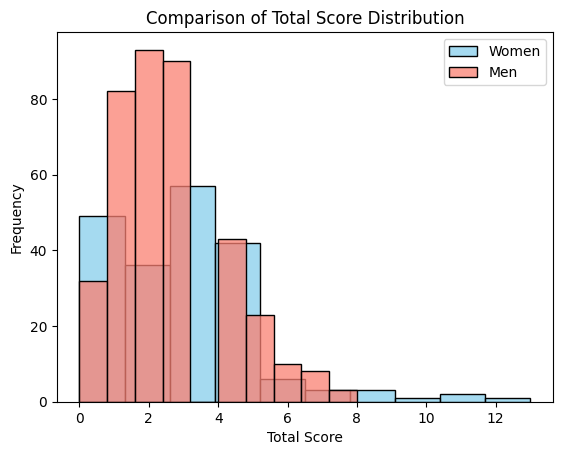

In [13]:
# For normality, you can use visual inspection with a histogram

sns.histplot(x='total_score', data=women_world_cup, bins=10, color='skyblue', label='Women')
sns.histplot(x='total_score', data=men_world_cup, bins=10, color='salmon', label='Men')

plt.title('Comparison of Total Score Distribution')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.legend()  # Display legend with labels

plt.show()

The normal distribution is a symmetric bell-shaped curve, with the distribution centered around the mean.
Plotting a histogram displaying the distribution of the number of goals scored in men's and women's matches will give you an idea about whether the dataset is normally distributed or not.
If the normality is unclear from the plot, you can run a test of normality, such as a Kolmogorov–Smirnov test or the Shapiro–Wilk test.

In [14]:
from scipy.stats import kstest, norm
import numpy as np

# Perform Kolmogorov-Smirnov test against a normal distribution
ks_statistic_women, ks_p_value_women = kstest(women_world_cup['total_score'], 'norm')
ks_statistic_men, ks_p_value_men = kstest(men_world_cup['total_score'], 'norm')

# Define significance level (e.g., 0.05)
alpha = 0.05

# Print the results for women
print(f"KS Statistic_women: {ks_statistic_women}")
print(f"P-value_women: {ks_p_value_women}")

# Interpret the results for women
if ks_p_value_women < alpha:
    print("The sample may not be from a normal distribution.")
else:
    print("The sample appears to be from a normal distribution.")

print("-----------------------------------------------------------")

# Print the results for men
print(f"KS Statistic_men: {ks_statistic_men}")
print(f"P-value_men: {ks_p_value_men}")

# Interpret the results for women
if ks_p_value_women < alpha:
    print("The sample may not be from a normal distribution.")
else:
    print("The sample appears to be from a normal distribution.")

KS Statistic_women: 0.8113447460685429
P-value_women: 9.431656241073112e-144
The sample may not be from a normal distribution.
-----------------------------------------------------------
KS Statistic_men: 0.7580114127352096
P-value_men: 4.802304083566529e-230
The sample may not be from a normal distribution.


In [15]:
# We can't use this test, because our dataset is not normally distributed based on Kolmogorov–Smirnov test but  we use it just ...
# to display how ttest works in similar situation

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(women_world_cup['total_score'], men_world_cup['total_score'], equal_var=False, alternative='greater')
print(f"t_test: {t_stat}", " - ", f"p_value: {p_value}")

t_test: 2.812822759620731  -  p_value: 0.0025980724004871503


In [16]:
# Performing the hypothesis test using scipy package

from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(women_world_cup['total_score'], men_world_cup['total_score'], alternative='greater')  # Set alternative to 'greater'

# Define significance level (alpha)
alpha = 0.10  # 10 percent

# Print the results
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that women total goals is greater than men total goals scored.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that women total goals is greater than men total goals scored")


Mann-Whitney U Statistic: 43273.0
P-value: 0.005106609825443641
Reject the null hypothesis. There is evidence that women total goals is greater than men total goals scored.


In [17]:
# Performing the hypothesis test using pingouin package

import pingouin as pg

# Perform Mann-Whitney U test
result_pg = pg.mwu(women_world_cup['total_score'], men_world_cup['total_score'], alternative='greater')  # Set tail to 'greater' for a right-tailed test

# Print the results
print(result_pg)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [18]:
# Interpreting the result of the hypothesis test (from pingouin package)

# Extract p-value as a float
p_val = result_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


# ALternative Solution

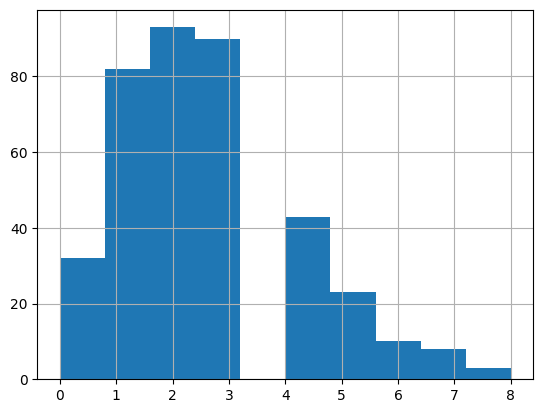

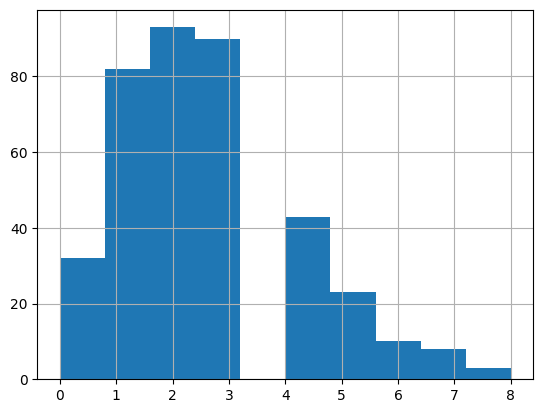

{'p_val': 0.005106609825443641, 'result': 'reject'}


<Figure size 640x480 with 0 Axes>

In [19]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

# Create group and goals_scored columns
men_subset = men_subset.copy()
women_subset = women_subset.copy()

men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
print(result_dict)